<a href="https://colab.research.google.com/github/888Lucy888/MLMatch/blob/main/MLdatingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


---


# Speed Dating Dataset Analysis and ML
### By Jessica Fernanda Isunza and Celia Lucia Castaneda Arizaga


---


---


#### Speed Dating Dataset: https://www.kaggle.com/datasets/mexwell/speed-dating

#####In 2002-2004, Columbia University ran a speed-dating experiment where they tracked data over 21 speed dating sessions for mostly young adults meeting people of the opposite sex.


####Attributes:

- Gender: 0 for male and 1 for female.

- Age: Years of the individuals in the dataset.

- Income: Annual income in USD. Note that there is a significant portion of missing data in this attribute.

- Goal: The dataset provides labels (int), but the specific meanings of these labels are not provided.

- Career: Occupation of the individuals.

- Dec: Rater's decision on whether this individual was a match, coded as 0 (no) or 1 (yes).

- Attr: Attractiveness of the individual, rated 0-10.

- Sinc: Sincerity of the individual, rated 0-10.

- Intel: Intelligence of the individual, rated 0-10.

- Fun: Fun factor of the individual, rated 0-10.

- Amb: Ambitiousness of the individual, rated 0-10.

- Shar: Shared interests between individuals, rated 0-10.

- Like: Overall rating given by the rater, rated 0-10.

- Prob: Rater's rating on whether they believed that interest would be reciprocated, rated 0-10.

- Met: Whether the two individuals had met prior to the speed date, coded as 0 or 2, with 0 indicating they had not met before.

### Imports

In [ ]:
import sys
import os
from google.colab import drive
import matplotlib as mlp
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import copy
import math
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
# Pretty
from tabulate import tabulate
import seaborn as sns

###Step 1: read data and show

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Final_Sim')

file_name = "speed_data_data.csv"
data = pd.read_csv(file_name)

data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8378 non-null   int64  
 1   age     8283 non-null   float64
 2   income  4279 non-null   float64
 3   goal    8299 non-null   float64
 4   career  8289 non-null   object 
 5   dec     8378 non-null   int64  
 6   attr    8176 non-null   float64
 7   sinc    8101 non-null   float64
 8   intel   8082 non-null   float64
 9   fun     8028 non-null   float64
 10  amb     7666 non-null   float64
 11  shar    7311 non-null   float64
 12  like    8138 non-null   float64
 13  prob    8069 non-null   float64
 14  met     8003 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 981.9+ KB


####Delete if missing
in this step we searched every missing value in the data base and deleted every row that had missing values that could interfere with the functionality of our algorithm.
the columns that have missing values are age, income, career, attr, sinc, intel, fun, amb, shar, like, prob, and met.
since we will focus on using age, career, income and goal to compare we decided to clean the missing values on those columns, after that we can now create a new data called data_clean and delete the columns we decided not to use for our algorithm

In [ ]:
print("All columns in data: \n", data.columns)

#missing information
info_missing = [col for col in data.columns if data[col].isnull().any()]
print("\nCols with missing values:\n", info_missing)

data.drop(info_missing, axis=1)

# NaN data age
missing_age_rows = data[data["age"].isna()]
print("\nRows w NaN in 'age':")
print(missing_age_rows)

# NaN data in career, income and goal
missing_career_income_goal_rows = data[data[["career", "income", "goal"]].isnull().all(axis=1)]
print("\nRows w NaN in 'career', 'income', 'goal':")
print(missing_career_income_goal_rows)

data.drop(missing_career_income_goal_rows.index, inplace=True)
data.info()

All columns in data: 
 Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

Cols with missing values:
 ['age', 'income', 'goal', 'career', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']

Rows w NaN in 'age':
      gender  age  income  goal   career  dec  attr  sinc  intel  fun  amb  \
828        0  NaN     NaN   NaN      NaN    0   4.0   9.0    9.0  8.0  8.0   
829        0  NaN     NaN   NaN      NaN    1   7.0   7.0    8.0  5.0  NaN   
830        0  NaN     NaN   NaN      NaN    1   6.0   7.0    9.0  8.0  7.0   
831        0  NaN     NaN   NaN      NaN    1   8.0   8.0    9.0  9.0  7.0   
832        0  NaN     NaN   NaN      NaN    0   5.0   9.0    9.0  9.0  9.0   
...      ...  ...     ...   ...      ...  ...   ...   ...    ...  ...  ...   
7493       0  NaN     NaN   1.0  Actress    0   NaN   NaN    NaN  NaN  NaN   
7494       0  NaN     NaN   1.0  Actre

###Step 2: clean unnecesary data

#### We removed columns that had unclear data or extra data not needed or prepared for our analysis, leaving the following attributes:

- Gender: 0 for male and 1 for female.

- Age: Years of the individuals in the dataset.

- Income: Annual income in USD. Note that there is a significant portion of missing data in this attribute.

- Career: Occupation of the individuals.

- Attr: Attractiveness of the individual, rated 0-10.

- Sinc: Sincerity of the individual, rated 0-10.

- Intel: Intelligence of the individual, rated 0-10.

- Fun: Fun factor of the individual, rated 0-10.

- Amb: Ambitiousness of the individual, rated 0-10.


---


We will be having the decison attribute as our outcome:
(We decided on this attribute instead of the like attribute because while examining the data we noticed that people who had same like scores could have different match values, making the match value more definitive)

- Dec: Rater's decision on whether this individual was a match, coded as 0 (no) or 1 (yes).


In [ ]:
data_clean = data.drop(columns=["prob", "met", "goal","shar", "like"])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8299 entries, 0 to 8377
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8299 non-null   int64  
 1   age     8267 non-null   float64
 2   income  4279 non-null   float64
 3   career  8289 non-null   object 
 4   dec     8299 non-null   int64  
 5   attr    8105 non-null   float64
 6   sinc    8030 non-null   float64
 7   intel   8011 non-null   float64
 8   fun     7957 non-null   float64
 9   amb     7596 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 713.2+ KB


#### Histograms

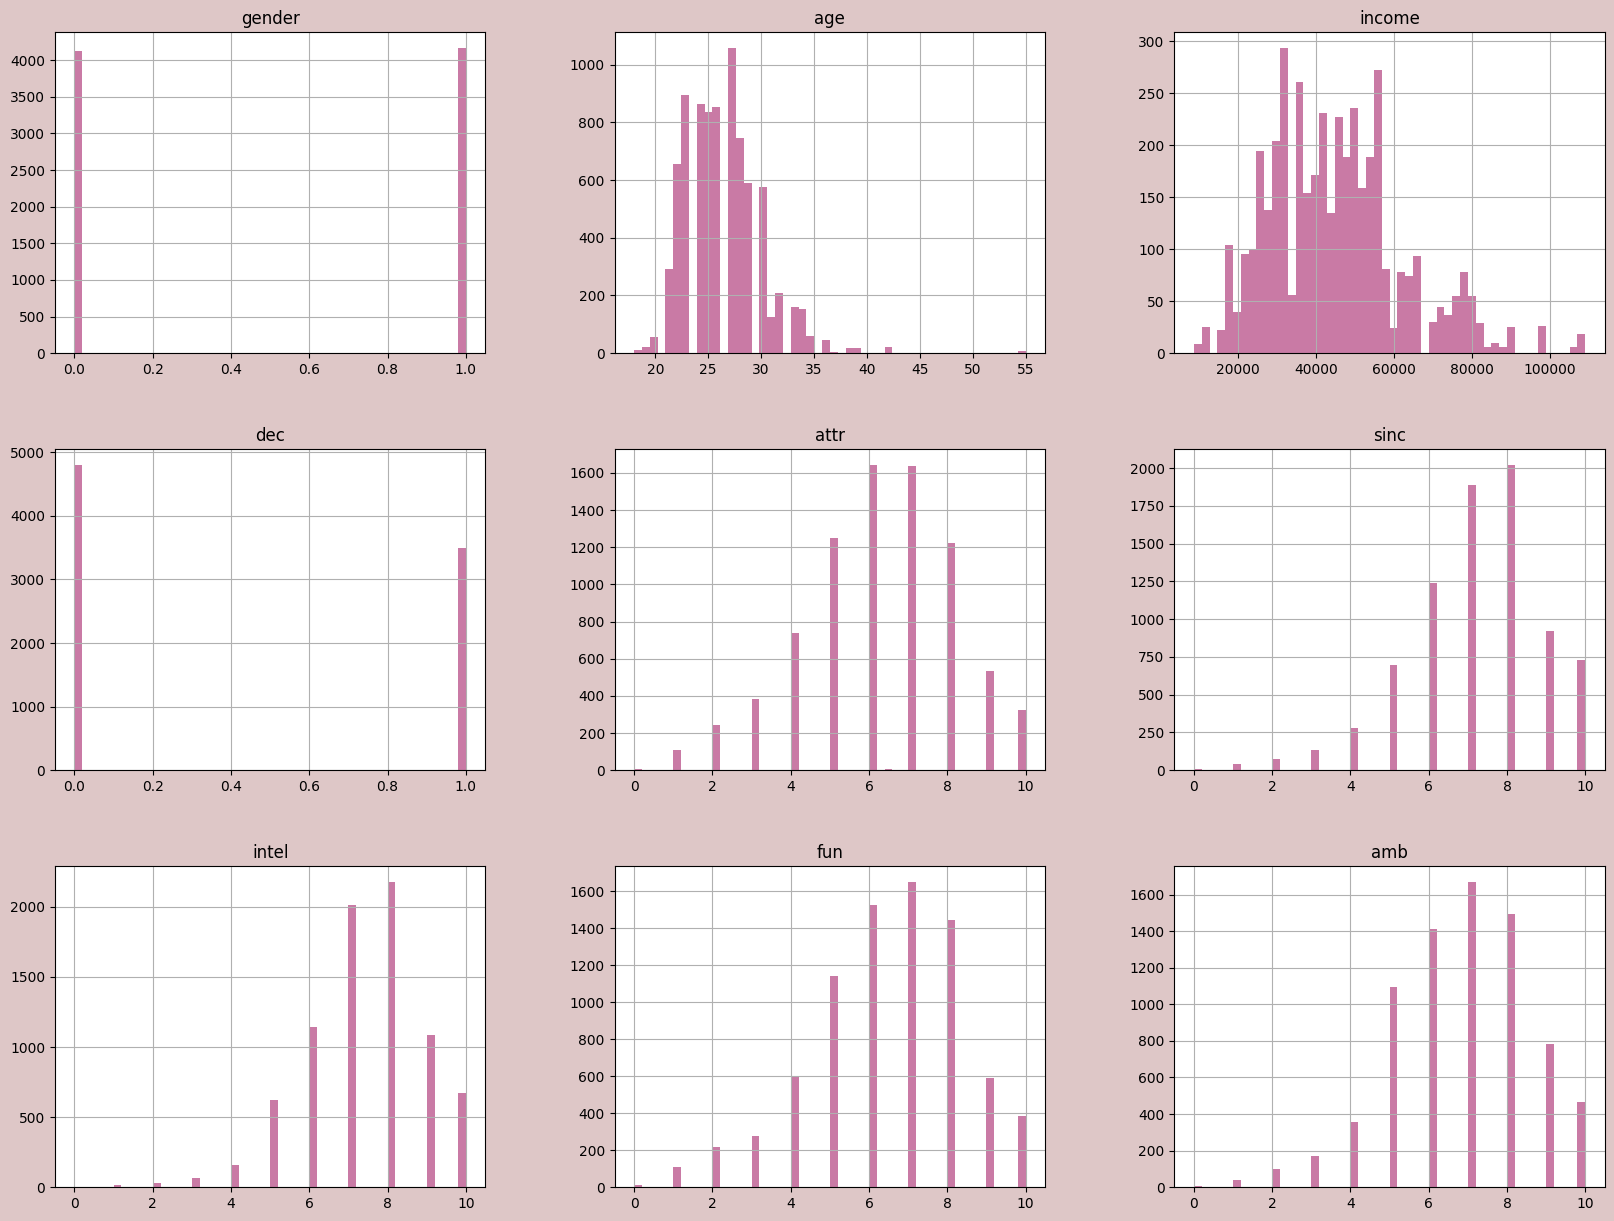

In [ ]:
data_clean.hist(bins=50, figsize=(20, 15), color='#c97aa5')
plt.gcf().set_facecolor('#dec7c7')
plt.show()

#### Central Tendency Measurements

In [ ]:
description = data_clean.describe()

styled_description = description.style.set_table_styles([
    {'selector': 'tbody tr', 'props': [('background-color', '#dec7c7'), ('color', '#927b7b')]},
    {'selector': 'th', 'props': [('background-color', '#3e3434'), ('color', '#c97aa5')]}
])

styled_description

,gender,age,income,dec,attr,sinc,intel,fun,amb
count,8299.000000,8267.000000,4279.000000,8299.000000,8105.000000,8030.000000,8011.000000,7957.000000,7596.000000
mean,0.502952,26.359623,44887.606450,0.421135,6.191783,7.175031,7.367807,6.400842,6.778699
std,0.500021,3.570178,17206.920962,0.493771,1.949538,1.741436,1.549073,1.950856,1.794109
min,0.000000,18.000000,8607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,31516.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000
50%,1.000000,26.000000,43185.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000
75%,1.000000,28.000000,54303.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1.000000,55.000000,109031.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Career is non-numeric
Showing labels in lowercase
(Also adding values from social work to social worker, law to lawyer, etc)

In [ ]:
data_clean["career"] = data_clean["career"].str.lower()

data_clean["career"] = data_clean["career"].replace({
    "social work": "social worker",
    "law": "lawyer",
    "academia":"academic"
})

data_clean["career"].value_counts()

career
lawyer                      456
professor                   347
social worker               244
finance                     228
consulting                  224
                           ... 
not sure yet                  6
asset management              5
a research position           5
engineering professional      5
mba                           5
Name: count, Length: 322, dtype: int64

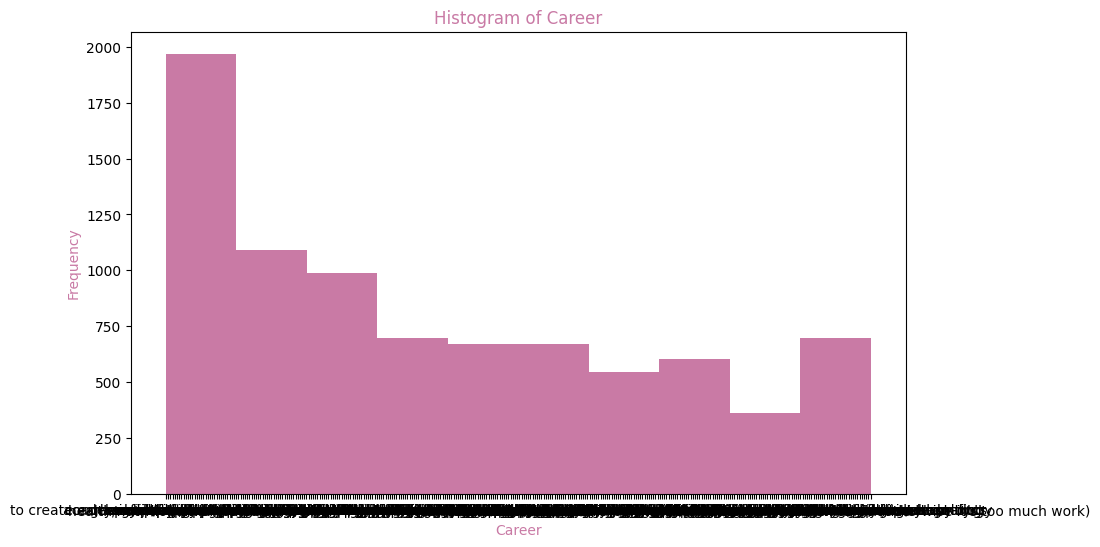

In [ ]:
plt.figure(figsize=(10, 6))
data_clean["career"].hist(color='#C97AA5')
plt.title('Histogram of Career', color='#C97AA5')
plt.xlabel('Career', color='#C97AA5')
plt.ylabel('Frequency', color='#C97AA5')
plt.grid(False)
plt.show()

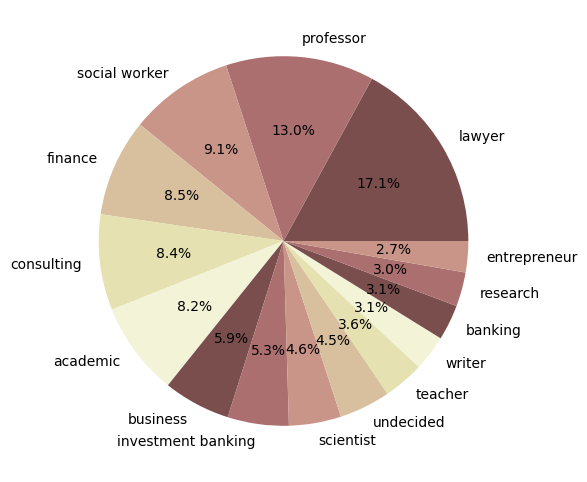

In [ ]:
pastel_palette = sns.color_palette("pink")

plt.figure(figsize=(10, 6))

pie_chart = plt.pie(
    x=data_clean["career"].value_counts().nlargest(15),
    labels=data_clean["career"].value_counts().nlargest(15).index,
    autopct="%1.1f%%",
    colors=pastel_palette
)

plt.show()

Due to unclean data (ej. scientific research for now, but who knows)
And not enough time to clean it.
Removing career column

In [ ]:
data_clean = data_clean.drop(columns=["career"])

#### Correlation Matrix

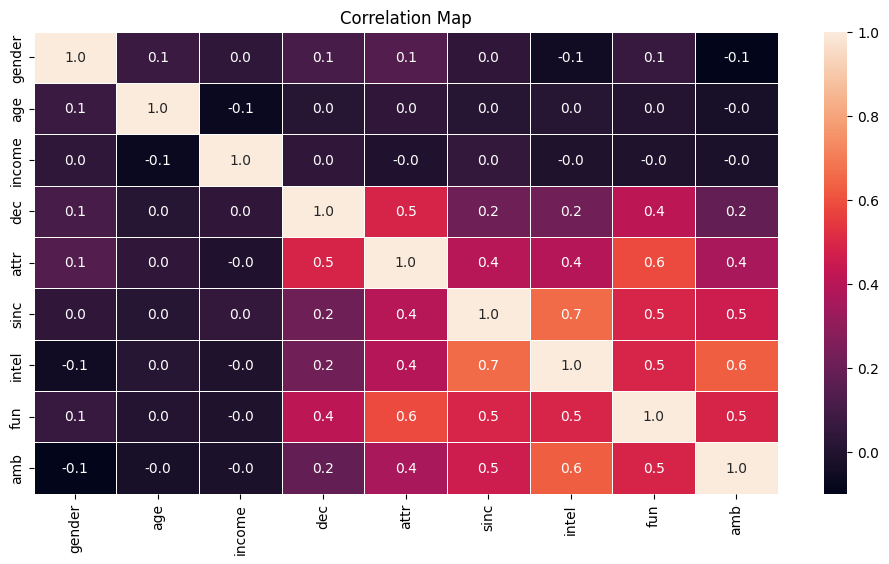

In [ ]:
f,ax=plt.subplots(figsize = (12,6))
sns.heatmap(data_clean.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.title('Correlation Map')
plt.show()

### There are strong correlations with the following attributes:

* Intelligence - Sincerity
* Intelligence - Ambition
* Attractiveness - Fun
* Attractiveness - Decision (matched)


### Step 3: Divide data in to training and testing data

In [ ]:
X = data_clean.drop(columns=['dec'])  # Features
y = data_clean['dec']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain Data Head")
print(X_train.head())
print(y_train.head())

print("\nTest Data Head")
print(X_test.head())
print(y_test.head())

# Preprocessing pipeline for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill NaN values with median
    ('scaler', MinMaxScaler())
])

# Apply preprocessing pipeline to train and test data
X_train_processed = numeric_transformer.fit_transform(X_train)
X_test_processed = numeric_transformer.transform(X_test)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=X_train.columns)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=X_test.columns)

print("\n\nProcess Data (Fill NaN values with median and scale (0-1)\n")

print("\nTrain Data Processed Head")
print(X_train_processed_df.head())
print("\nTest Data Processed Head")
print(X_test_processed_df.head())


Train Data Head
      gender   age   income  attr  sinc  intel  fun  amb
3047       1  26.0  53501.0   4.0   8.0    4.0  5.0  4.0
494        0  24.0  24997.0   8.0   6.0    9.0  9.0  6.0
1388       1  29.0  35968.0   8.0   7.0    8.0  7.0  6.0
2148       0  28.0  38832.0   3.0   6.0    7.0  4.0  5.0
7400       1  24.0  12416.0   7.0   8.0    9.0  6.0  8.0
3047    0
494     0
1388    0
2148    0
7400    1
Name: dec, dtype: int64

Test Data Head
      gender   age   income  attr  sinc  intel  fun  amb
5981       0  28.0  50725.0   5.0   7.0    6.0  8.0  5.0
5872       0  25.0  78704.0   8.0   7.0    8.0  9.0  9.0
4036       1  24.0      NaN   4.0   8.0    8.0  5.0  9.0
2862       0  31.0      NaN   7.0   8.0    9.0  9.0  7.0
4736       1  32.0      NaN   4.0   5.0    5.0  4.0  4.0
5981    0
5872    1
4036    0
2862    0
4736    0
Name: dec, dtype: int64


Process Data (Fill NaN values with median and scale (0-1)


Train Data Processed Head
   gender       age    income  attr  sinc  inte

###Step 4: Use ML Classification Models

Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_processed_df, y_train)
y_pred_forest = random_forest.predict(X_test_processed_df)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.7487951807228915
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       958
           1       0.73      0.65      0.69       702

    accuracy                           0.75      1660
   macro avg       0.74      0.74      0.74      1660
weighted avg       0.75      0.75      0.75      1660



Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_processed_df, y_train)
y_pred_logistic = logistic_regression.predict(X_test_processed_df)

accuracy = accuracy_score(y_test, y_pred_logistic)
classification_rep = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Logistic Regression Accuracy: 0.7301204819277108
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       958
           1       0.69      0.65      0.67       702

    accuracy                           0.73      1660
   macro avg       0.72      0.72      0.72      1660
weighted avg       0.73      0.73      0.73      1660



Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_processed_df, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_processed_df)
accuracy = accuracy_score(y_test, y_pred_decision_tree)
classification_rep = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Classifier Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Decision Tree Classifier Accuracy: 0.6885542168674699
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       958
           1       0.64      0.62      0.63       702

    accuracy                           0.69      1660
   macro avg       0.68      0.68      0.68      1660
weighted avg       0.69      0.69      0.69      1660



###Step 6: Most important data (weights)

Feature importances:
+---------+----------------------+
| Feature |      Importance      |
+---------+----------------------+
|  attr   |  0.2407857609254388  |
|   age   |  0.1661581753932508  |
| income  | 0.14910931989251922  |
|   fun   |  0.1455156912307622  |
|   amb   |  0.0979706866208073  |
|  sinc   | 0.09354288936944355  |
|  intel  | 0.08209451958449016  |
| gender  | 0.024822956983288007 |
+---------+----------------------+


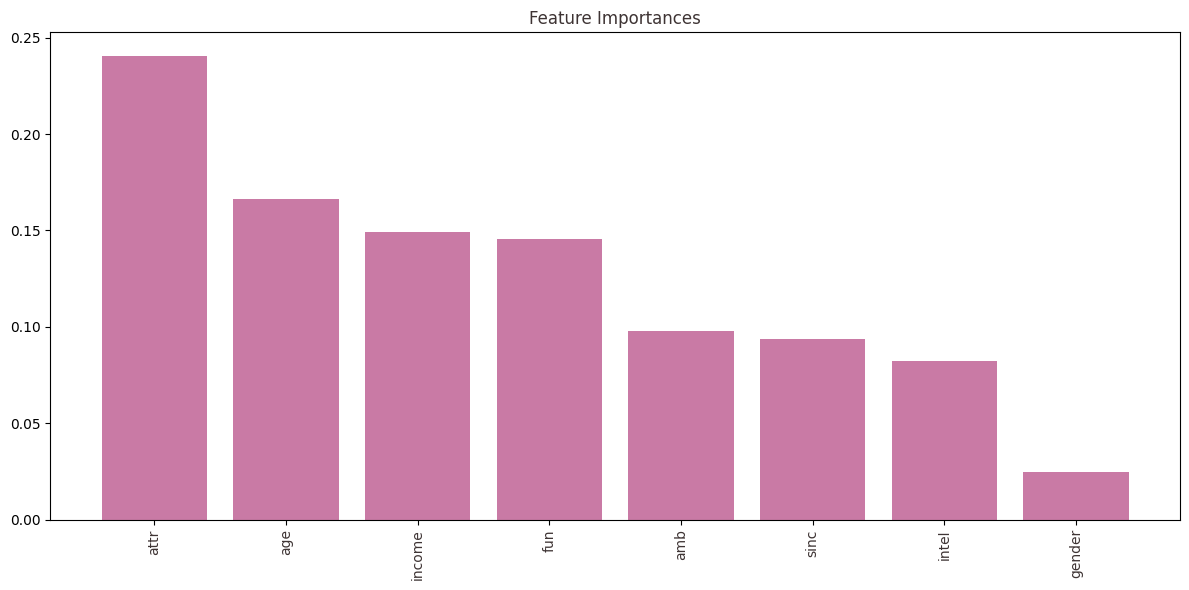

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Important data
feature_importance_table = []
for i in range(X.shape[1]):
    feature_importance_table.append([X.columns[indices[i]], importances[indices[i]]])

print("Feature importances:")
print(tabulate(feature_importance_table, headers=["Feature", "Importance"], tablefmt="pretty"))

# Visualization of data
plt.figure(figsize=(12, 6))
plt.title("Feature Importances", color='#3e3434')
plt.bar(range(X.shape[1]), importances[indices], align="center", color='#C97AA5')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90, color='#3e3434')
plt.tight_layout()
plt.show()

## Conclusion

####The most crucial features in the survey are attractiveness, age, income, and fun.

####We spent a significant amount of time refining the data and determining what would be useful and what wouldn't. One of the biggest challenges was deciding how to handle missing or incorrectly filled data. Ultimately, we chose to remove rows that were practically useless due to this issue.

####We were surprised by the relationships we found among some attributes, such as attractiveness and its influence on decision-making, as well as sincerity and intelligence, which are often scored lower. We also discovered that individuals with lower intelligence tend to answer questions incorrectly or leave fields blank, resulting in missing data.

####We learned that the most important and challenging aspect of predicting data is cleaning it and establishing correlations to determine the desired outcome and the type of machine learning model to use.

#### We had fun doing this analysis and inputting people at the end to see if they are capable of finding a match with the given data

#### Jess: I learned that choosing the data base is not the most important thing, i used to think that if a data base was not suitable for the project you had to search por another one, i learned that data needs to be cleaned and some values need to be converted in order to be used correctly, i also learned the importance of all the process that we need to do before even thinking about the main Machine Learning algorithm, i think that the visualization part of this course was very useful for this project since it was easier to know what to do and what to use after displaying the information as tables and diagrams.

#### Lucy: I learned a lot about managing data and the importance of not skipping steps while analyzing everything since a simple missing value or a badly formatted one can change the model drastically and affect its accuracy. Even though our accuracy was 76% I believe it is better considering binary classification gives you a 50% naturally. This project helped us learn about data cleaning, managing and analysis as well as machine learning models and how to use them and about dating prefernces.

## Extra test

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Add your input data
feature_names=['gender', 'age', 'income', 'attr', 'sinc', 'intel', 'fun', 'amb']
# EXAMPLE: new_data = [[gender_value(0-male,1-female), age_value, income_value (USD anual), attr_value, sinc_value, intel_value, fun_value, amb_value]]

new_data = [[0, 28, 87739, 8, 7, 8, 8, 7]] # Average male

# Preprocess the input data
new_data_processed = numeric_transformer.transform(new_data)
predicted_outcome = logistic_regression.predict(new_data_processed)

print("Predicted outcome:", predicted_outcome)

Predicted outcome: [1]


In [ ]:
new_data = [[0, 28, 187739, 1, 9, 9, 4, 10]] # Rich but ugly male

# Preprocess the input data
new_data_processed = numeric_transformer.transform(new_data)
predicted_outcome = logistic_regression.predict(new_data_processed)

print("Predicted outcome:", predicted_outcome)

Predicted outcome: [0]
